###  Sales Campaign analysis

__An introduction to the Facebook advertising platform__<br/>
Along with Google's search and display networks, Facebook is one of the big players when it comes to online advertising. As Facebook users interact with the platform, adding demographic information, liking particular pages and commenting on specific posts, Facebook builds a profile of that user based on who they are and what they're interested in.<br/>
This fact makes Facebook very attractive for advertisers. Advertisers can create Facebook adverts, then create an 'Audience' for that advert or group of adverts. Audiences can be built from a range of attributes including gender, age, location and interests. This specific targetting means advertisers can tailor content appropriately for a specific audience, even if the product being marketed is the same.<br/>

__What do we need from our Facebook ads analysis?__<br/>
When it comes to analysing the Facebook adverts dataset, there are a lot of questions we can ask, and a lot of insight we can generate. However, from a business perspective we want to ask questions that will give us answers we can use to improve business performance.<br/>
Without knowing anything of the company's marketing strategy or campaign objectives, we do not know which key performance indicators (KPIs) are the most important. For example, a new company may be focussed on brand awareness and may want to maximise the amount of impressions, being less concerned about how well these adverts perform in terms of generating clicks and revenue. Another company may simply want to maximise the amount of revenue, while minimising the amount it spends on advertising.<br/>
As these two objectives are very different, it is important to work with the client to understand exactly what they are hoping to achieve from their marketing campaigns before beginning any analysis in order to ensure that our conclusions are relevant and, in particular, actionable. There's not much point in producing a report full of insight, if there's nothing the client can do about it.



__Understanding the dataset__<br/>
The data used in this project is from an anonymous organisation’s social media ad campaign. The data contains 1143 observations in 11 variables. Below are the descriptions of the variables. Since you are working with numpy, refer the `Feature Index` column for the indices of every feature.

|Feature Index|Features|Description|
|----|----|----|
|0|ad_id| unique ID for each ad|
|1|xyz_campaign_id| an ID associated with each ad campaign of XYZ company|
|2|fb_campaign_id| an ID associated with how Facebook tracks each campaign|
|3|age| age of the person to whom the ad is shown|
|4|gender| gender of the person to whom the add is shown|
|5|interest| a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile)|
|6|Impressions| the number of times the ad was shown|
|7|Clicks| number of clicks on for that ad|
|8|Spent| Amount paid by company xyz to Facebook, to show that ad|
|9|Total conversion| Total number of people who enquired about the product after seeing the ad|
|10|Approved conversion| Total number of people who bought the product after seeing the ad|

Below is a snapshot of the data you will be working with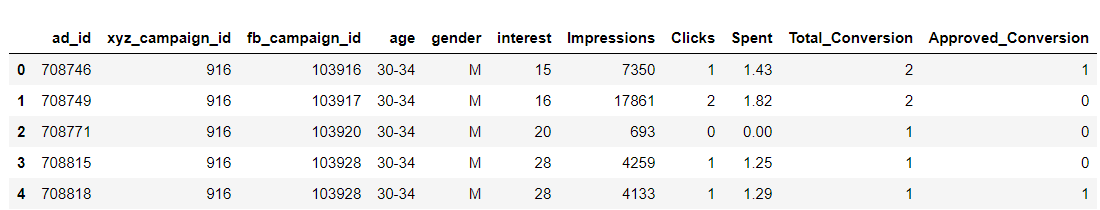

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys

In [2]:
# Command to display all the columns of a numpy array
np.set_printoptions(threshold=sys.maxsize)

### Let's load the data

In [4]:
import csv
path = '../data/KAG_conversion_data.csv'

with open(path) as f:
    adm = csv.reader(f,delimiter=',')
    adm = list(adm)

# Remove the header
adm.remove(adm[0])

# Convert the data into a numpy array and store it in sales_data
sales_data=np.array(adm)


Let's delve into the data to find the answers to some questions

### How many unique ad campaigns (xyz_campaign_id) does this data contain ? And for how many times was each campaign run ?

In [5]:
from collections import Counter
print(np.unique(sales_data[:,1]))
Counter(sales_data[:,1])

['1178' '916' '936']


Counter({'916': 54, '936': 464, '1178': 625})

#### Another way to perform the above task using numpy is as follows below

In [6]:
# Code Starts here


xyz_campaign_id = np.bincount(sales_data[:,1].astype(int))
total_campaigns = np.nonzero(xyz_campaign_id)[0]

# Total number of campaigns
print('The Total number of campaign are: ',len(total_campaigns),end='.   ')
print('They are: ',total_campaigns)
print()

# Total times each campaign ran
campaign = total_campaigns
number_of_times = list(xyz_campaign_id[total_campaigns])
print('The number of times each campaign ran is given as: ',end='  ')
print(dict(zip(campaign,number_of_times)))

# Code Ends here

The Total number of campaign are:  3.   They are:  [ 916  936 1178]

The number of times each campaign ran is given as:   {916: 54, 936: 464, 1178: 625}


### What are the age groups that were targeted through these ad campaigns ?

In [7]:
# Code Starts here

age = sales_data[:,3]

# Age groups are categorized as bins. So get a unique count of the bin
age_groups = np.unique(age)

print("The age groups targeted are ",age_groups)

# Code Ends here

The age groups targeted are  ['30-34' '35-39' '40-44' '45-49']


So the people targeted belong to the ages 30-49

### What was the average, minimum and maximum amount spent on the ads ?

In [8]:
max_amt = sales_data[:,8].astype(float).max()
min_amt = sales_data[:,8].astype(float).min()
avg_amt = sales_data[:,8].astype(float).mean()

print('Minimum amt spent on ads was ',min_amt)
print('Maximum amt spent on ads was ',max_amt)
print('Average amt spent on ads was ',avg_amt)

Minimum amt spent on ads was  0.0
Maximum amt spent on ads was  639.9499981
Average amt spent on ads was  51.36065613141295


### What is the id of the ad having the maximum number of clicks ?

In [9]:
# What were the maximum number of clicks
clicks = sales_data[:,7].astype(int).max()
print('The maximum number of clicks were ',clicks)
print()

# Which was the ad having the maximum number of clicks
max_clicks_ad = sales_data[:,0][sales_data[:,7].astype(int)==clicks]
print('The advertisement with the maximum number of clicks was the one with id ',max_clicks_ad)

The maximum number of clicks were  421

The advertisement with the maximum number of clicks was the one with id  ['1121814']


### How many people bought the product after seeing the ad with most clicks ? Is that the maximum number of purchases in this dataset  ?

In [10]:
max_sales = int(sales_data[:,-1][sales_data[:,0]==max_clicks_ad])
print('Number of people who bought the product having maximum ad clicks is ',max_sales)

print()

# Max value of the Approved_Conversion column
max_purchases = sales_data[:,-1].astype(int).max()

if (max_sales >= max_purchases):
    print("The maximum sales were on this product")
elif (max_sales <= max_purchases):
    print('The maximum number of purchases was ',max_purchases)

Number of people who bought the product having maximum ad clicks is  13

The maximum number of purchases was  21


### So the ad with the most clicks didn't fetch the maximum number of purchases. Let's find the details of the product having maximum number of purchases

In [11]:
max_purchases = sales_data[:,0][sales_data[:,-1].astype(int) == sales_data[:,-1].astype(int).max()]

print("The ad id for the product having maximum number of purchases is: ",max_purchases)
print()
print('The record for this product is as shown below')
sales_data[sales_data[:,-1].astype(int)==sales_data[:,-1].astype(int).max()]

The ad id for the product having maximum number of purchases is:  ['1121104']

The record for this product is as shown below


array([['1121104', '1178', '144533', '30-34', 'M', '16', '2080666',
        '202', '360.1500015', '40', '21']], dtype='<U11')

If you look at the value for impressions for this product which is the 7th value in the array, it can be seen that this product had a very high number of __impressions__ !

### Creating additional features

Let's add some additional features that will represent some additional standard metrics.

###  Click Through Rate (CTR)
This is the percentage of how many of our impressions became clicks. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.

### Create a new feature `Click Through Rate`  (CTR) and then concatenate it to the original numpy array 

CTR = $\frac{Clicks}{Impressions}$x100

In [12]:
# Code starts here

# Create a new numpy array to calculate CTR
CTR = np.array((sales_data[:,7].astype(float)/sales_data[:,6].astype(float))*100)

# Note the shapes of CTR and the original array are different
print(sales_data.shape)
print('The original shape of CTR is ',CTR.shape)

# Convert CTR to the same shape as that of the original array
CTR = CTR.reshape(-1,1)
print('New shape of CTR is ',CTR.shape)

# Concatenate CTR to the original array
sales_data = np.concatenate((sales_data, CTR),axis=1)
sales_data
# Code ends here

(1143, 11)
The original shape of CTR is  (1143,)
New shape of CTR is  (1143, 1)


array([['708746', '916', '103916', '30-34', 'M', '15', '7350', '1',
        '1.429999948', '2', '1', '0.013605442176870748'],
       ['708749', '916', '103917', '30-34', 'M', '16', '17861', '2',
        '1.820000023', '2', '0', '0.011197581322434353'],
       ['708771', '916', '103920', '30-34', 'M', '20', '693', '0', '0',
        '1', '0', '0.0'],
       ['708815', '916', '103928', '30-34', 'M', '28', '4259', '1',
        '1.25', '1', '0', '0.023479690068091103'],
       ['708818', '916', '103928', '30-34', 'M', '28', '4133', '1',
        '1.289999962', '1', '1', '0.024195499637067505'],
       ['708820', '916', '103929', '30-34', 'M', '29', '1915', '0', '0',
        '1', '1', '0.0'],
       ['708889', '916', '103940', '30-34', 'M', '15', '15615', '3',
        '4.769999981', '1', '0', '0.01921229586935639'],
       ['708895', '916', '103941', '30-34', 'M', '16', '10951', '1',
        '1.269999981', '1', '1', '0.009131586156515388'],
       ['708953', '916', '103951', '30-34', 'M', '27

### Create a new column that represents Cost Per Mille (CPM) .
This number is the cost of one thousand impressions. If your objective is ad exposure to increase brand awareness, this might be an important KPI for you to measure.

In [13]:
# Code starts here

# Create a new numpy array to calculate CPM
CPM = (sales_data[:,8].astype(float)/sales_data[:,6].astype(float))*1000

# Note the shapes of CPM and the original array are different
print(sales_data.shape)
print('The original shape of CPM is ',CPM.shape)

# Convert CTR to the same shape as that of the original array
CPM = CPM.reshape(-1,1)
print('New shape of CTR is ',CPM.shape)

# Concatenate CTR to the original array
sales_data = np.concatenate((sales_data, CPM),axis=1)
sales_data
# Code ends here

(1143, 12)
The original shape of CPM is  (1143,)
New shape of CTR is  (1143, 1)


array([['708746', '916', '103916', '30-34', 'M', '15', '7350', '1',
        '1.429999948', '2', '1', '0.013605442176870748',
        '0.19455781605442177'],
       ['708749', '916', '103917', '30-34', 'M', '16', '17861', '2',
        '1.820000023', '2', '0', '0.011197581322434353',
        '0.10189799132187448'],
       ['708771', '916', '103920', '30-34', 'M', '20', '693', '0', '0',
        '1', '0', '0.0', '0.0'],
       ['708815', '916', '103928', '30-34', 'M', '28', '4259', '1',
        '1.25', '1', '0', '0.023479690068091103', '0.29349612585113877'],
       ['708818', '916', '103928', '30-34', 'M', '28', '4133', '1',
        '1.289999962', '1', '1', '0.024195499637067505',
        '0.31212193612388095'],
       ['708820', '916', '103929', '30-34', 'M', '29', '1915', '0', '0',
        '1', '1', '0.0', '0.0'],
       ['708889', '916', '103940', '30-34', 'M', '15', '15615', '3',
        '4.769999981', '1', '0', '0.01921229586935639',
        '0.30547550310598787'],
       ['708895', 